In [25]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/Users/nshah/work/vcimpute/output'

df = pd.concat([pd.read_csv(f'{data_dir}/{fid}') for fid in os.listdir(data_dir)])

df.groupby(['copula_type', 'd', 'mask_fraction'])['n'].count()

df['col'] = 'smae_mdpfit' + df['vine_structure'].fillna('R')

df['smae_mdpfit'] = np.select(
    [df['vine_structure'] == 'C', df['vine_structure'] == 'D', df['vine_structure'] == 'R'],
    [df['smae_mdpfitC'], df['smae_mdpfitD'], df['smae_mdpfitR']], 
    default=df['smae_mdpfitR']
)

df['bias_mdpfit'] = np.select(
    [df['vine_structure'] == 'C', df['vine_structure'] == 'D', df['vine_structure'] == 'R'],
    [df['bias_mdpfitC'], df['bias_mdpfitD'], df['bias_mdpfitR']], 
    default=df['bias_mdpfitR']
)

Text(0, 0.5, 'mdpfit bias')

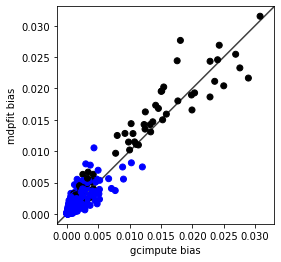

In [41]:
assert not df['bias_mdpfit'].isnull().any()

plt.scatter(df['bias_gcimpute'], df['bias_mdpfit'], color=np.where(df['vine_structure'].isnull(), 'k', 'b'))
ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xlabel('gcimpute bias')
plt.ylabel('mdpfit bias')

Text(0, 0.5, 'mdpfit elapsed')

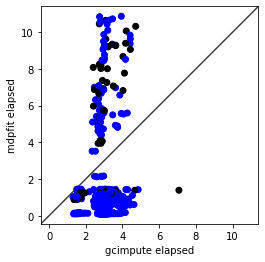

In [64]:
df['elapsed_mdpfit'] = np.select(
    [df['vine_structure'] == 'C', df['vine_structure'] == 'D', df['vine_structure'] == 'R'],
    [df['elapsed_mdpfitC'], df['elapsed_mdpfitD'], df['elapsed_mdpfitR']], 
    default=df['elapsed_mdpfitR']
)

assert not df['elapsed_mdpfit'].isnull().any()

plt.scatter(df['elapsed_gcimpute']/1e9, df['elapsed_mdpfit']/60e9, color=np.where(df['vine_structure'].isnull(), 'k', 'b'))
ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_yli m()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xlabel('gcimpute elapsed')
plt.ylabel('mdpfit elapsed')

(array([ 59., 286.,   0., 196.,   0.,  30.,   0.,   0.,   0.,   1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

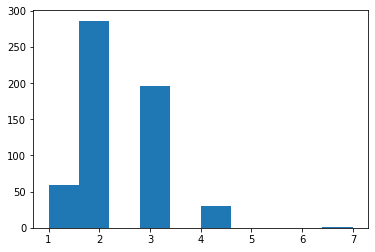

In [62]:
plt.hist(df['elapsed_gcimpute'].apply(pd.Timedelta).apply(lambda x: x.seconds))

(array([406.,  66.,   0.,   6.,  24.,  14.,  14.,  12.,  16.,  14.]),
 array([  5. ,  69.6, 134.2, 198.8, 263.4, 328. , 392.6, 457.2, 521.8,
        586.4, 651. ]),
 <BarContainer object of 10 artists>)

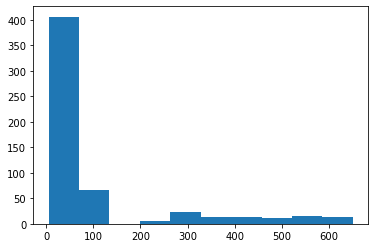

In [63]:
plt.hist(df['elapsed_mdpfit'].apply(pd.Timedelta).apply(lambda x: x.seconds))